In [18]:
import scanpy as sc 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import anndata as ad
import pandas as pd
import scib
from harmony import harmonize
from scipy import stats
os.system("clear")
%matplotlib inline

###############
data_dir="/home/ubuntu/benchmarking/data/"
###############

In [19]:
adata_raw = ad.read_h5ad(f"{data_dir}merged_stereo.h5ad")

In [20]:
adata_raw

AnnData object with n_obs × n_vars = 11000 × 27852
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'annotation', 'Brain_shapes', 'Face_shapes', 'Heart_shapes', 'Lung_shapes', 'Liver_shapes', 'Shapes_shapes', 'Belly_shapes', 'Back_shapes', 'region', 'batch'
    uns: 'log1p', 'pca'
    obsm: 'X_pca', 'spatial', 'spatial_back'
    varm: 'PCs'

In [21]:
adata_raw.X.data

array([5.5422783, 5.5422783, 5.5422783, ..., 7.864818 , 5.3841267,
       6.4796753], dtype=float32)

Harmony is an algorithm for integrating single-cell data from multiple experiments. This function uses the python port of Harmony, harmonypy, to integrate single-cell data stored in an AnnData object. As Harmony works by adjusting the principal components, this function should be run after performing PCA but before computing the neighbor graph, as illustrated in the example below.

## Raw dataset visualization

/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'batch'}, xlabel='UMAP1', ylabel='UMAP2'>

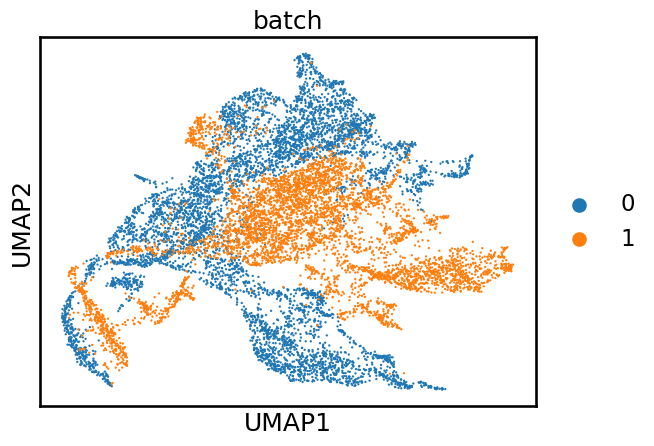

In [22]:
adata_copy=adata_raw.copy()
# sc.pp.normalize_total(adata_copy,target_sum=1e4)
# sc.pp.log1p(adata_copy)
# sc.pp.highly_variable_genes(adata_copy,n_top_genes=2000,subset=True)
# sc.pp.scale(adata_copy)
# sc.tl.pca(adata_copy)
sc.pp.neighbors(adata_copy)
sc.tl.umap(adata_copy)
sc.pl.umap(adata_copy,color=["batch"],show=False)

In [23]:
scib.me.ilisi_graph(adata_copy, batch_key="batch", type_="embed", use_rep="X_pca")

0.023708844737008183

## Harmony integration

In [24]:
# sc.tl.pca(adata_raw)
adata_raw.obsm["X_emb"] = harmonize(adata_raw.obsm["X_pca"], adata_raw.obs, batch_key='batch')

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
	Completed 6 / 10 iteration(s).
	Completed 7 / 10 iteration(s).
	Completed 8 / 10 iteration(s).
Reach convergence after 8 iteration(s).


/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'batch'}, xlabel='UMAP1', ylabel='UMAP2'>

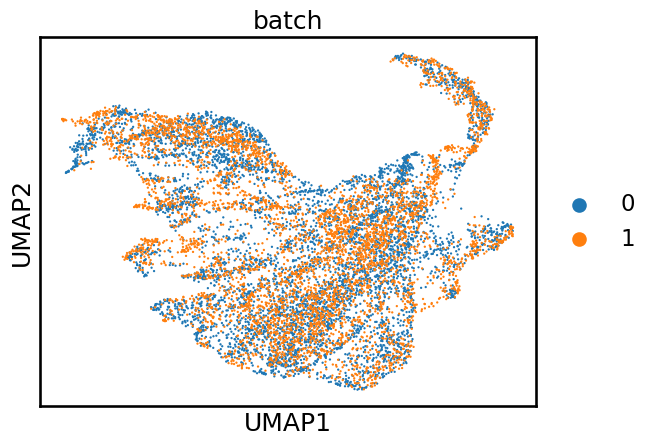

In [25]:
###########################################
sc.pp.neighbors(adata_raw,random_state=0,use_rep="X_emb")
sc.tl.umap(adata_raw)
###########################################

sc.pl.umap(adata_raw,color=["batch"],show=False)
#plt.savefig(save_dir+"scDML_embedding1.png")


In [26]:
scib.me.ilisi_graph(adata_raw, batch_key="batch", type_="embed", use_rep="X_emb")

0.8212294643091087